# #GCC Build System

Description: This tutorial covers using Linux environment like Ubuntu to understand the compilation concept of a simple C program. 

Tutorial Level: BEGINNER

Next Tutorial: coming soon

### What actually happens A to Z in the compilation process (from preprocessing to execution)?

The following steps are performed on a linux machine with gcc compiler to produce the results.













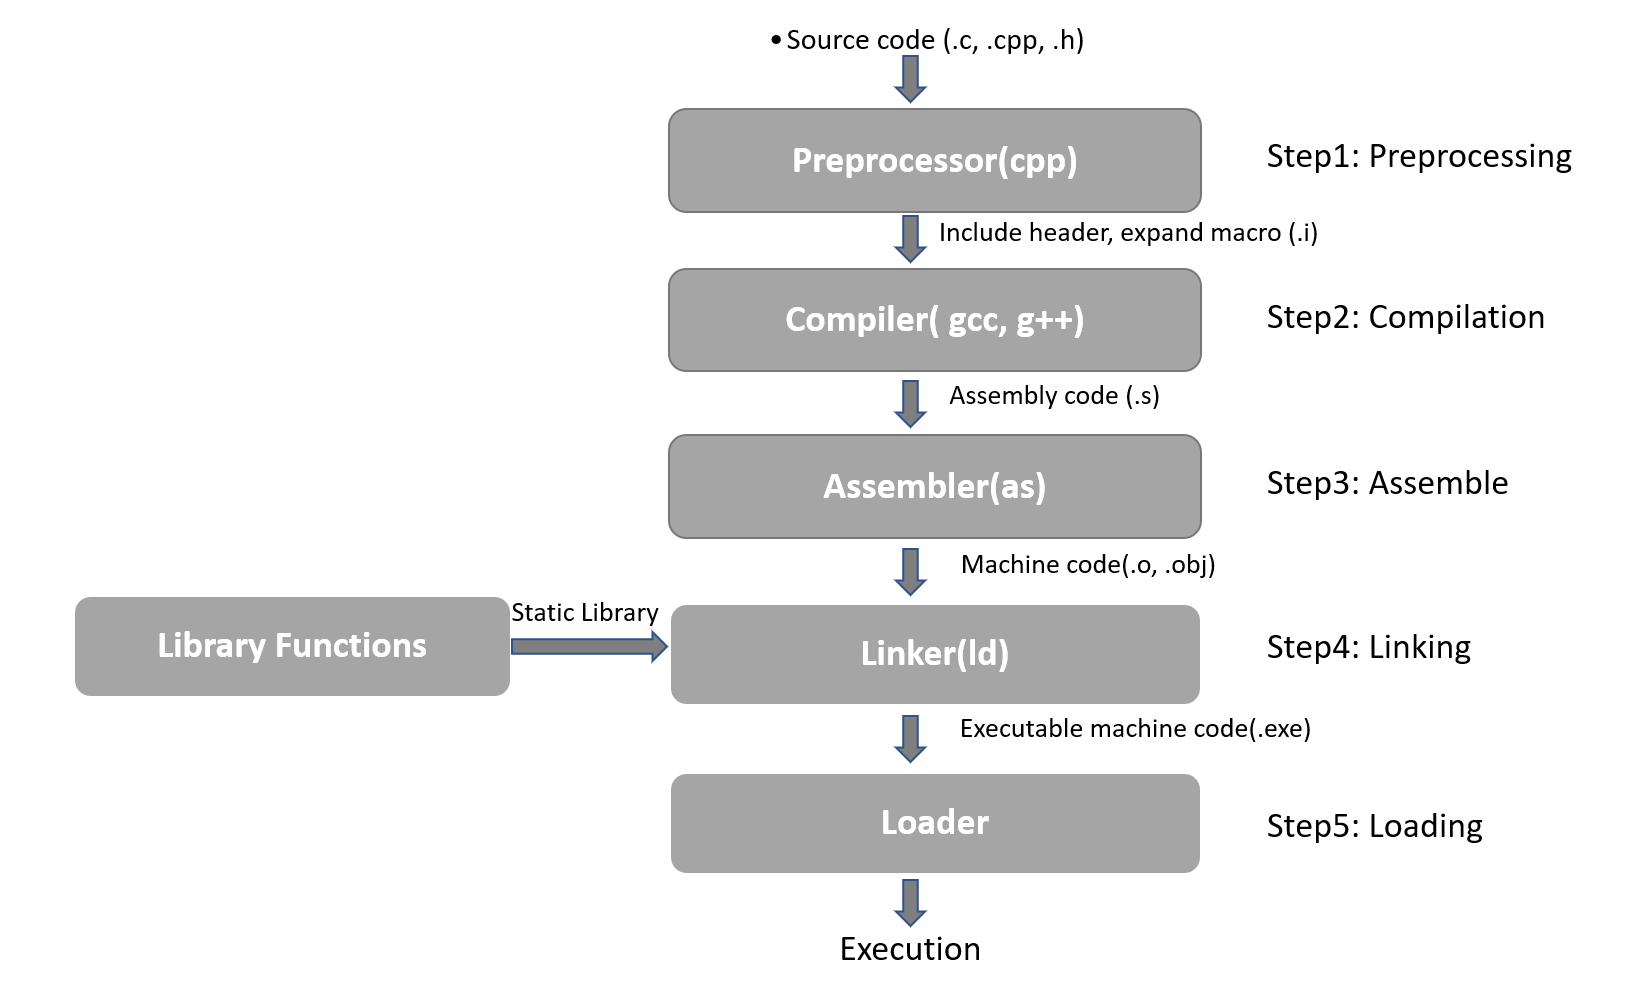


First we create a C program using touch command or from an editor and save the file as **file1.c**

> $ touch file1.c

Next we a header file using the same method as above and save the file as **file1.h**

> $ touch file1.h

Below we can see the both .C and .H files.




```c
/*  Header file (file1.h)        
A simple function declaration   */
#define area 7 
int add(int a);
```

```c
/*  C file (file1.c)        
A simple C program without main()   */
#include"file1.h"
int add(int a){
	int X=area;
	return a;
}
```

Finally we shall compile it using below commands:



   



> gcc -save-temps file1.c 

> gcc -Wall -save-temps file1.c -o file1

The option -Wall enables all compiler’s warning messages and the option -o is used to specify the output file name.

Below are the files which are being generated after running the above the command.







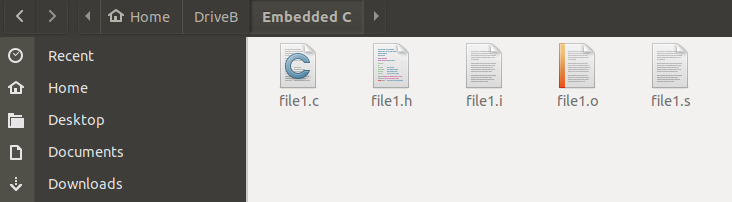










Post execution of above command we get all intermediate files in the current directory except the executable file. The reason for not generating the executable file is due the fact that without main function the compiler does know from where the program starts and hence it throws an error like below:










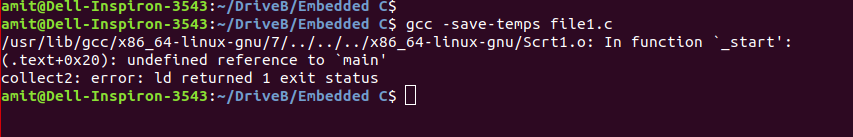

### What compiler does behind the scene?

   #### 1. Pre-processing
   #### 2. Compilation
   #### 3. Assembly
   #### 4. Linking
   #### 5. Loading
    
    
    
    
    
    
    
    
    
    
    
    

> #### 1. Pre-processing:

It is the first phase through which source code is passed. This phase include:

    • Removal of Comments
    • Expansion of Macros
    • Expansion of the included files.
    • Conditional compilation
    
The preprocessed output is stored in the Intermediate files i.e. file1.i.

- Case 1: C file without standard library.

Lets see the content of it using:
$cat file1.i


Below command also shows the preprocessor’s output in the terminal
command: gcc -e file1.c
    

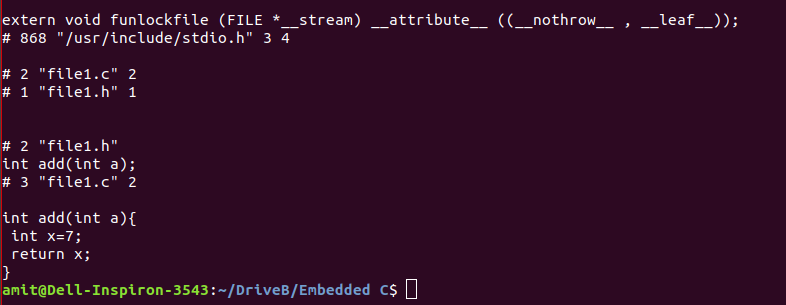




Analysis:
Here we can see the source file is filled with lots of informatioin, and at the end our code is present.
We find that the function declaration is copy pasted as it in the .i file. 
Comments are stripped off.
Variable X is equated to 7 that’s because macros have expanded.


- Case 1: C file with standard library.

Lets again see the content of intermediate file using:
$cat file1.i

Or using any text editor(here I have used Geany text editor just for readibility.)

Below screenshot shows the intial contents of file1.i

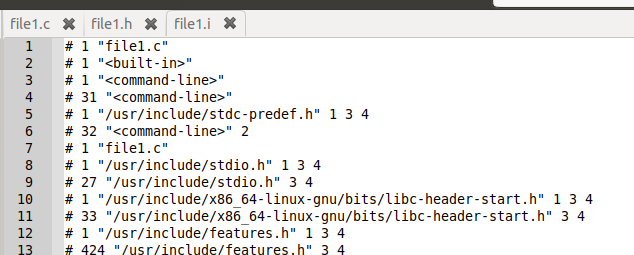

And following screenshot shows the final contents of file1.i which contains our code.

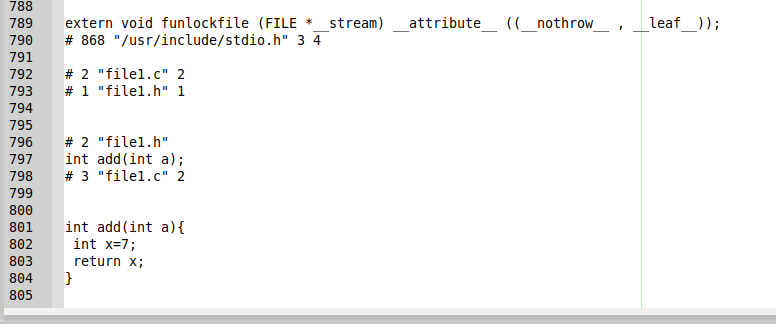


Analysis:
we can see in line number 7 the "stdio.h" header file has been encountered by the compiler and post line number 7 entire library is being pasted as it is in intermediate file. Our code is again present at the end of intermediate file. 


> #### 2. Compiling

The second step is to compile file1.i and produce an assembly compiled output file called file1.s. This file contains all the assembly level instructions. Below command also shows the compiler’s output in the terminal
command: 

> gcc -e file1.c 

Let’s see through this file using   

> $cat file1.s

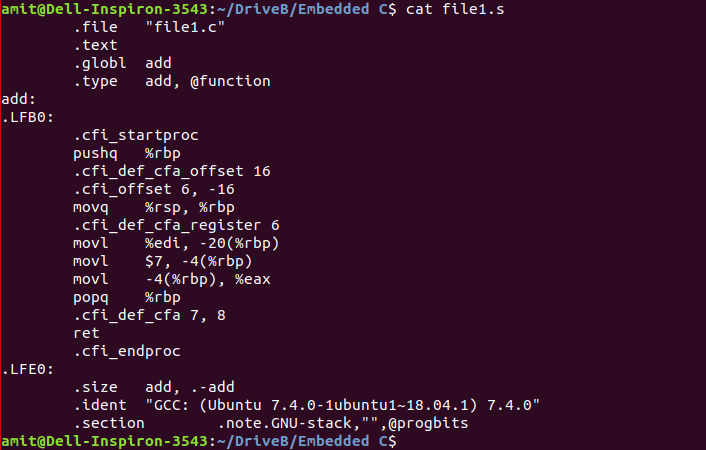



The snapshot shows that it is in assembly language, which assembler can understand.




> #### 3. Assembly

- This step takes the assembly source code file1.s as an input and produces an assembly listing i.e. the machine level instructions (pure binary code) with offsets which is stored as an object file as file1.o by the assembler.

- At this step, only existing code is converted into machine language, the standard library function like printf() or scanf() are not undertaken. Let’s view this file using

> $cat file1.o


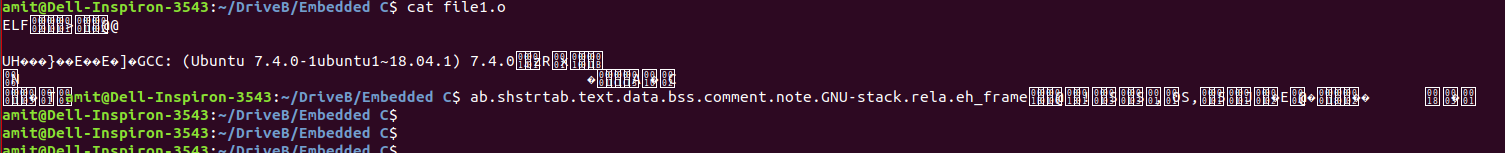




> #### 4.Linking

linking stage performs the following functions:

a. It links the function calls with their definitions.

b. Multiple object files created from the various source files are also linked in this stage by the Linker.

Since, our code doesn't contain main function therefore the Linker is unable to generate the executable file because of the fact that without main function the Linker does know from where the program starts. However, it has partially linked the various source files.

c. Adds extra code to the program which is required when the program starts and ends. For instance, let's take our code with main function and check the size of file to verify that Linker adds some extra code to the program.


Lets add the main function to our code and again we have to generate our new source files for the Linker to link it and create an executable. 

```c
/*  C file (file1.c)        
A simple function definatiion without main()   */
#include"file1.h"
int main()
{
int add(int a){
	int X=area;
	return a;
}
    return 0;
    } // main() ends here
```
Note: With main function the compiler knows the starting address of the program i.e. main() and hence it generates all files including the executable file.

Run the below command again

> gcc -save-temps file1.c 

Below we can see the new executable file called a.out which is being generated after running the above the command.

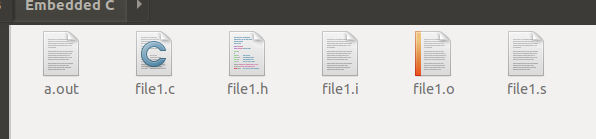




Finally, lets verify that Linker adds some extra code to the program by running the below two commands.

> $size file1.o   and

> $size file1

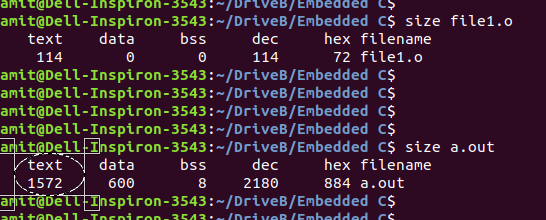


Hence, these commands shows the increase in the size of the text which the linker adds to the output file from an object file to form an executable code.

d. Libraries Functions which consist of pre-compiled object files are also linked through linker. Examples: system functions such as printf() and sqrt(). When the program is linked against a static library, the machine code of external functions used in the program is copied into the executable.

Note: The library functions are part of C software and not the C program. The definitions of these functions are stored in their respective libraries. So, when we write #include, it includes stdio.h library which gives access to Standard Input and Output. The linker links the object files to the library functions and the program becomes a .exe file.

> #### 5.Loader


- When we give the command as below to execute a program(.exe file), the loader loads the .exe file in RAM and inform the CPU or specifically the program counter with the starting address of the program where it is loaded.

> ./file1.exe



Now that you have understood the full compilation process from the back hand side. let's talk more about [CPU Registers]().